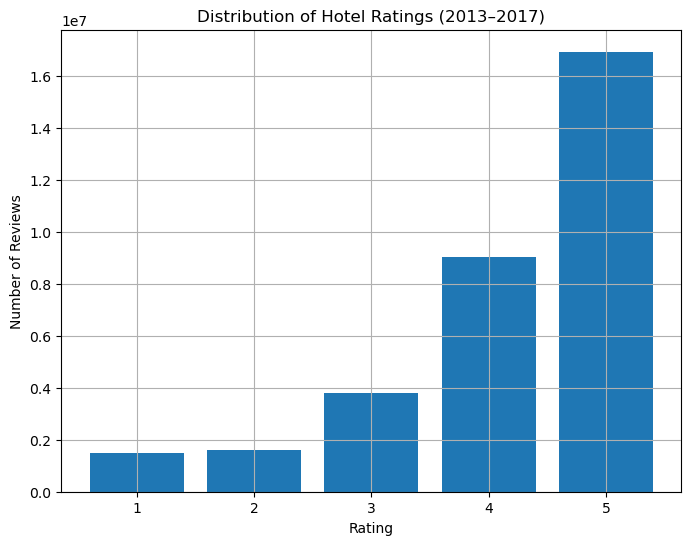

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

chunk_size = 1_000_000

chunks = pd.read_csv('data/processed/hotelrec_2013_2017_cleaned_encoded.csv.gz', compression='gzip', chunksize=chunk_size)

# Example: counting ratings
rating_counts = {}

for chunk in chunks:
    counts = chunk['rating'].value_counts()
    for rating, count in counts.items():
        if rating not in rating_counts:
            rating_counts[rating] = count
        else:
            rating_counts[rating] += count

# Convert to DataFrame
rating_counts_df = pd.DataFrame(list(rating_counts.items()), columns=['rating', 'count']).sort_values('rating')

# Plot
plt.figure(figsize=(8,6))
plt.bar(rating_counts_df['rating'], rating_counts_df['count'])

plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Hotel Ratings (2013–2017)')
plt.grid(True)
plt.show()

/tmp/ipykernel_1916/3914735724.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = chunk[numeric_cols].corr()
/tmp/ipykernel_1916/3914735724.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = chunk[numeric_cols].corr()
/tmp/ipykernel_1916/3914735724.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = chunk[numeric_cols].corr()
/tmp/ipykernel_1916/3914735724.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future

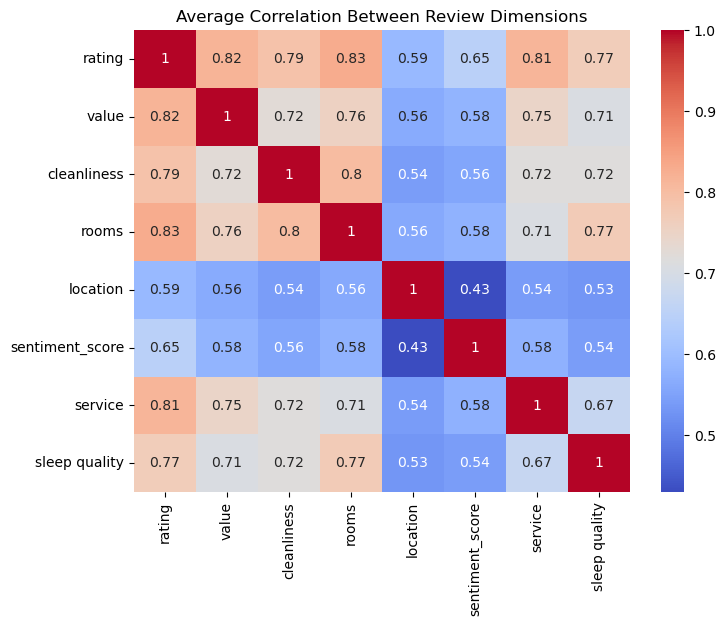

In [5]:
import numpy as np

all_corrs = []

for chunk in pd.read_csv('data/processed/hotelrec_2013_2017_cleaned_encoded.csv.gz', compression='gzip', chunksize=chunk_size):
    numeric_cols = ['rating', 'value', 'cleanliness', 'rooms', 'location', 'sentiment_score', 'service', 'sleep quality', 'season']
    corr = chunk[numeric_cols].corr()
    all_corrs.append(corr)

# Average correlation matrix
avg_corr = sum(all_corrs) / len(all_corrs)

import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(avg_corr, annot=True, cmap='coolwarm')
plt.title("Average Correlation Between Review Dimensions")
plt.show()


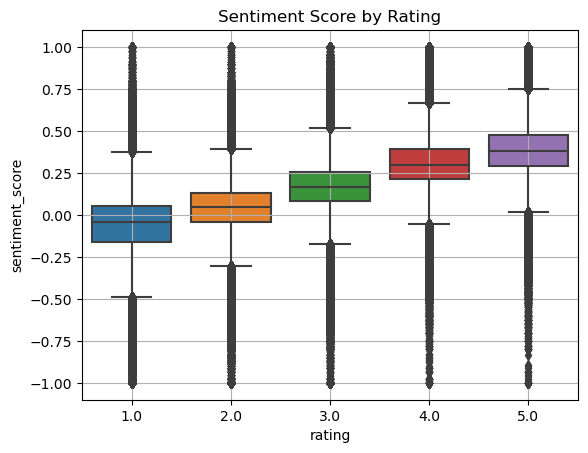

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

chunk_size = 1_000_000
sentiments = []

# Re-create fresh iterator
chunks = pd.read_csv('data/processed/hotelrec_2013_2017_cleaned_encoded.csv.gz',
                     compression='gzip', chunksize=chunk_size)

# Process chunks
for chunk in chunks:
    if 'rating' in chunk.columns and 'sentiment_score' in chunk.columns:
        sentiments.append(chunk[['rating', 'sentiment_score']].dropna())

# Now concatenate safely
if sentiments:
    df_sentiment = pd.concat(sentiments)

    sns.boxplot(data=df_sentiment, x='rating', y='sentiment_score')
    plt.title("Sentiment Score by Rating")
    plt.grid(True)
    plt.show()
else:
    print("⚠️ No sentiment data was found in any chunks.")


The pattern makes sense as the higher a rating is, the higher the sentiment score should be. One thing to point out is that the low ratings of 1.0 do not result in negative sentiment scores but are rather neutral sentiment scores

Counting ratings by season: 0it [00:00, ?it/s]

Counting ratings by season: 33it [01:27,  2.65s/it]


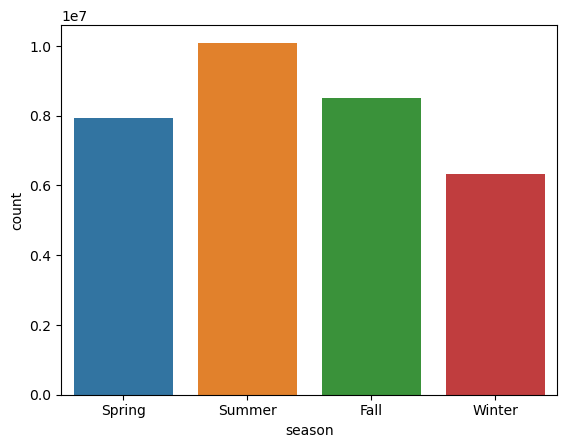

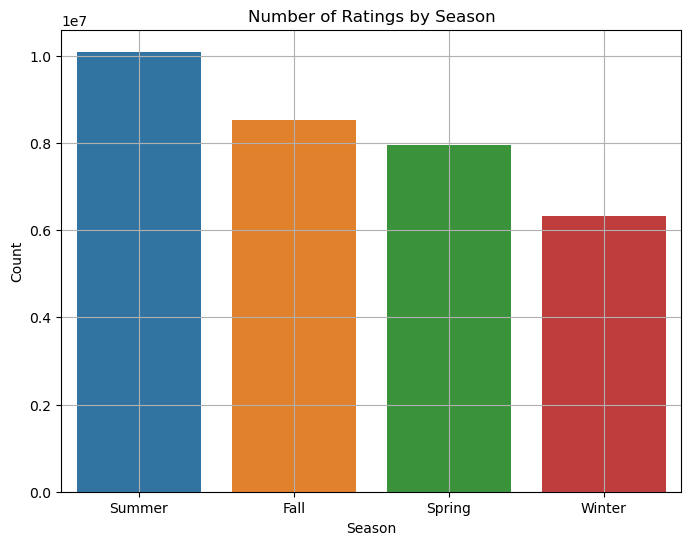

In [11]:
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

season_counts = Counter()

chunks = pd.read_csv('data/processed/hotelrec_2013_2017_cleaned_encoded.csv.gz',
                     compression='gzip', chunksize=1_000_000)

for chunk in tqdm(chunks, desc="Counting ratings by season"):
    counts = chunk['season'].value_counts()
    season_counts.update(counts.to_dict())

# Convert to DataFrame for plotting
season_df = pd.DataFrame(season_counts.items(), columns=['season', 'count'])
season_df = season_df.sort_values('count', ascending=False)

# Plot
sns.barplot(data=season_df, x='season', y='count', order=['Spring', 'Summer', 'Fall', 'Winter'])

plt.figure(figsize=(8, 6))
sns.barplot(data=season_df, x='season', y='count')
plt.title("Number of Ratings by Season")
plt.xlabel("Season")
plt.ylabel("Count")
plt.grid(True)
plt.show()


Overall faitrly distrubuted 